Demog scrapper creation and exploration.

- get the desmog dataset first 
    - run the desmog_scrapper.py script ~10min on my setup
    - [or download it](https://drive.google.com/drive/folders/1bFVQwchxCqGyfSlJSHTaUzHAx1ZB_Wb1?usp=drive_link)

- functions are in the desmog_scrapper

In [1]:
from desmog_scrapper import create_quote_dataframe, desmog_from_csv, add_data_quality_columns, remove_blockquotes
import pandas as pd

In [2]:
desmog_data = desmog_from_csv("../../.data/save/full_desmog_dataset.csv")

In [3]:
df = create_quote_dataframe(desmog_data)

In [4]:
df = create_quote_dataframe(desmog_data)
df = remove_blockquotes(df)
add_data_quality_columns(df)

In [5]:
df.to_csv("../../.data/df_blockquote_cleaned.csv",index=False)

In [6]:
df.is_full.value_counts()

is_full
False    8146
True     5909
Name: count, dtype: int64

In [7]:
df.sample(10)

,name,countries,item_type,url,section_source,quote,word_count,is_full
1672,Josef Reichholf,['Germany'],individual,https://www.desmog.com/josef-reichholf/,key_quotes,"It’s nothing but fear-mongering, for which the...",72,True
2478,Marc Morano,['United States'],individual,https://www.desmog.com/marc-morano/,blockquotes,If you personally were in charge of an organiz...,29,True
2640,Michael Shellenberger,['United States'],individual,https://www.desmog.com/michael-shellenberger/,blockquotes,My view is the drug crisis is objectively a mu...,86,False
2004,Center for Organizational Research and Educati...,['United States'],organization,https://www.desmog.com/center-organizational-r...,blockquotes,Berman’s developed a cottage industry of setti...,57,True
2745,Farris Wilks,['United States'],individual,https://www.desmog.com/farris-wilks/,blockquotes,We didn’t create the Earth so how can we save ...,52,False
2675,Henrik Svensmark,['Denmark'],individual,https://www.desmog.com/henrik-svensmark/,blockquotes,During the last 100 years cosmic rays became s...,30,False
2525,John O’Sullivan,['United Kingdom'],individual,https://www.desmog.com/john-o-sullivan/,blockquotes,e never have and never will get a detailed sci...,44,False
349,Samuele Furfari,['Belgium'],individual,https://www.desmog.com/samuele-furfari/,stance_quotes,no reason to panic,4,False
2187,Friends of Science,['Canada'],organization,https://www.desmog.com/friends-of-science/,blockquotes,chieving the aspirational goal of 80 per cent ...,43,False
2026,Clear Energy Alliance,['United States'],organization,https://www.desmog.com/clear-energy-alliance/,blockquotes,These protestors are unhappy about carbon taxe...,25,True


In [8]:
best_quotes = df[df['is_full']]
best_quotes = best_quotes[best_quotes["word_count"]>10]
print(best_quotes.quote.size)

for quote in best_quotes.sample(10).quote:
    print(quote)
    print('***')

5371
I am delighted with the early success  is having … Perhaps  is just the organization the media has long needed,
***
I know what I’ve asked you. The whole world knows what I just asked you. You don’t need to repeat it. You’re burning my time.
***
Many scientists are predicting the onset of two or three centuries of cooler weather — which would mean bigger glaciers. That’s despite the world’s growing use of fossil fuels. No matter what humans do, temperature trends go up, and then down; glaciers expand and then recede; sea levels rise and then fall, explains Will Happer, professor emeritus of physics at Princeton.
***
And that makes me a ‘terrible person’? I don’t have a glib attitude, I simply don’t sign up to the entirely fictitious climate ‘catastrophe’ madness. Most of the people on this planet don’t either. That’s a lot of terrible people for you to hate.
***
The primary focus of the Keep Calm Climate Changes campaign is educating students about the facts behind the current cli

In [15]:
best_quotes.to_csv("../../.data/best_quotes.csv",index=False)

### Insights
- If you are interested in a variety of quotes, try to get the blockquotes removed with "remove_blockquotes".
In articles which contain a "Stance on Climate Change" or "key quote" section with quotes, there are way higher chances from my exploration that the "block quotes" extracted will be non climate related.

- some quotes are still from the wrong sections. https://www.desmog.com/william-briggs/ => stance on gay marriage is h3 under the h2 of climate change and quotes are still inside it and considered "stance_quote" which is wrong.



## Data viz

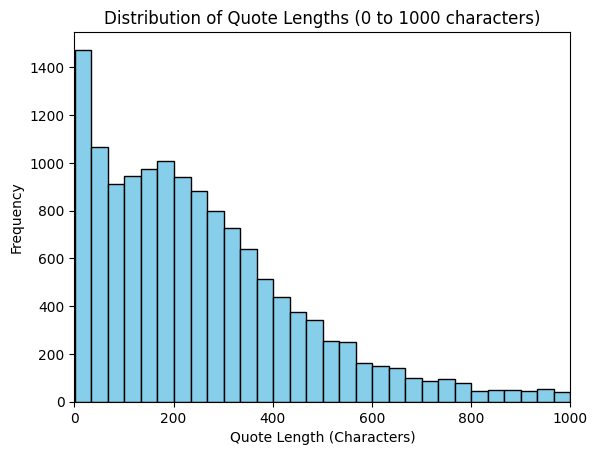

In [16]:
import matplotlib.pyplot as plt

# Calculate quote lengths
df["quote_length"] = df["quote"].apply(len)

# Filter quotes with length between 0 and 1000 characters
filtered_df = df[(df["quote_length"] >= 0) & (df["quote_length"] <= 1000)]

# Plot histogram of quote lengths (limited to 0-1000 characters)
plt.hist(filtered_df["quote_length"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Quote Lengths (0 to 1000 characters)")
plt.xlabel("Quote Length (Characters)")
plt.ylabel("Frequency")
plt.xlim(0, 1000)  # Limiting the x-axis to 0-1000 characters
plt.show()


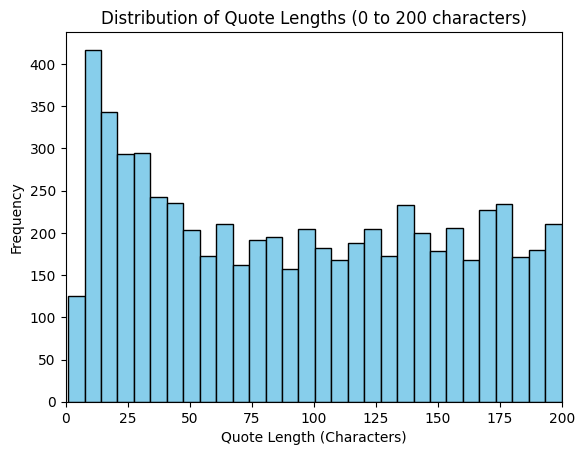

In [17]:
import matplotlib.pyplot as plt

# Calculate quote lengths
df["quote_length"] = df["quote"].apply(len)

# Filter quotes with length between 0 and 1000 characters
filtered_df = df[(df["quote_length"] >= 0) & (df["quote_length"] <= 200)]

# Plot histogram of quote lengths (limited to 0-200 characters)
plt.hist(filtered_df["quote_length"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Quote Lengths (0 to 200 characters)")
plt.xlabel("Quote Length (Characters)")
plt.ylabel("Frequency")
plt.xlim(0, 200)  # Limiting the x-axis to 0-200 characters
plt.show()


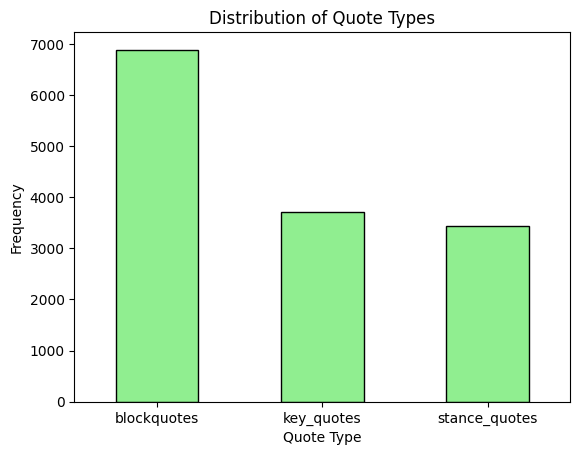

In [18]:
# Plot the distribution of quote types
quote_type_counts = df["section_source"].value_counts()

quote_type_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribution of Quote Types")
plt.xlabel("Quote Type")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


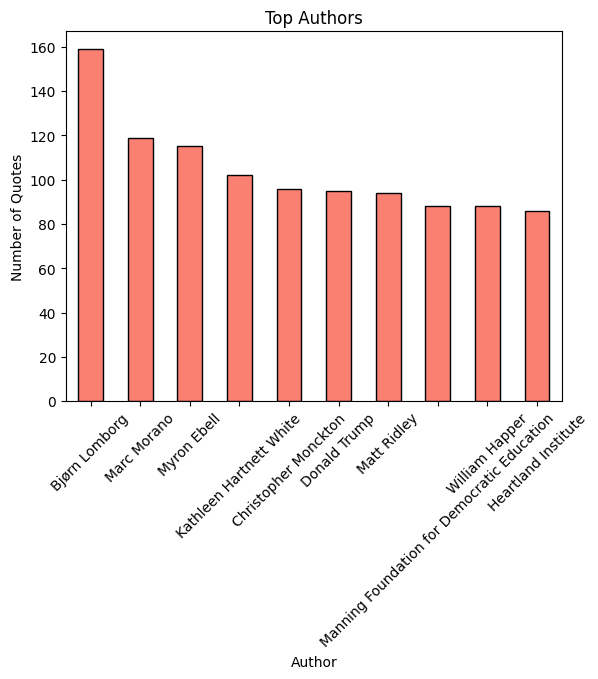

In [19]:
# Count the most frequent names
top_authors = df["name"].value_counts().head(10)

top_authors.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top Authors")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.xticks(rotation=45)
plt.show()


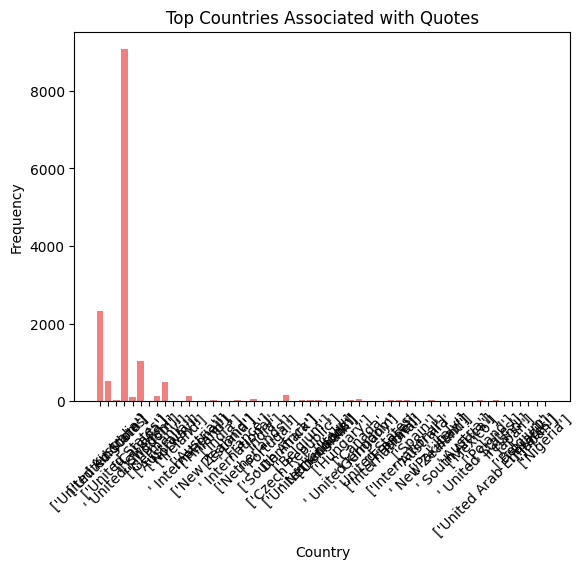

In [20]:
from collections import Counter

# Flatten the list of countries into a single list
all_countries = [country.strip() for countries in df["countries"] for country in countries.split(',')]

# Count the most common countries
country_counts = Counter(all_countries)

# Plot the most common countries
plt.bar(country_counts.keys(), country_counts.values(), color='lightcoral')
plt.title("Top Countries Associated with Quotes")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
